1. Add one more hidden layer to autoencoder

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the first hidden layer that learns the compressed representation
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Adding another hidden layer
encoded2 = Dense(64, activation='relu')(encoded)  # New hidden layer with 64 neurons

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded2)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# This model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Loading the data
from keras.datasets import fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Training the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.6971 - val_loss: 0.6969
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.6968 - val_loss: 0.6966
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.6965 - val_loss: 0.6963
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.6963 - val_loss: 0.6961
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.6960 - val_loss: 0.6958


2. Do the prediction on the test data and then visualize one of the reconstructed version of that test data.
Also, visualize the same test data before reconstruction using Matplotlib

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


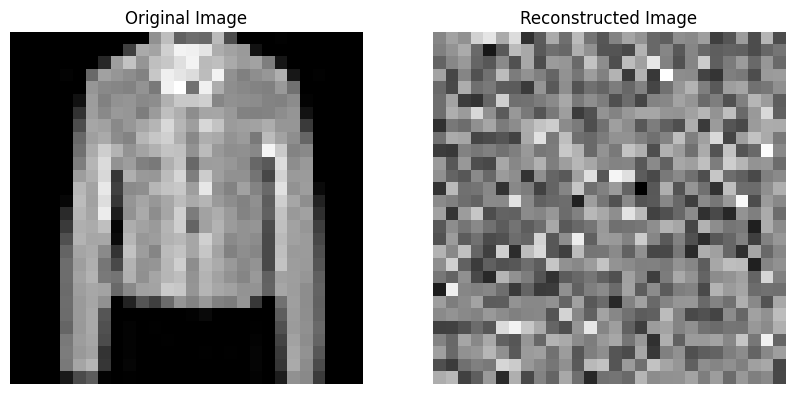

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Predict the reconstruction of the test data
reconstructed_imgs = autoencoder.predict(x_test)

# Choose an index to visualize
index = 10  # You can change this to any index you'd like

# Plot the original test image
plt.figure(figsize=(10, 5))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot the reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_imgs[index].reshape(28, 28), cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()


3.Repeat the question 2 on the denoisening autoencoder

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


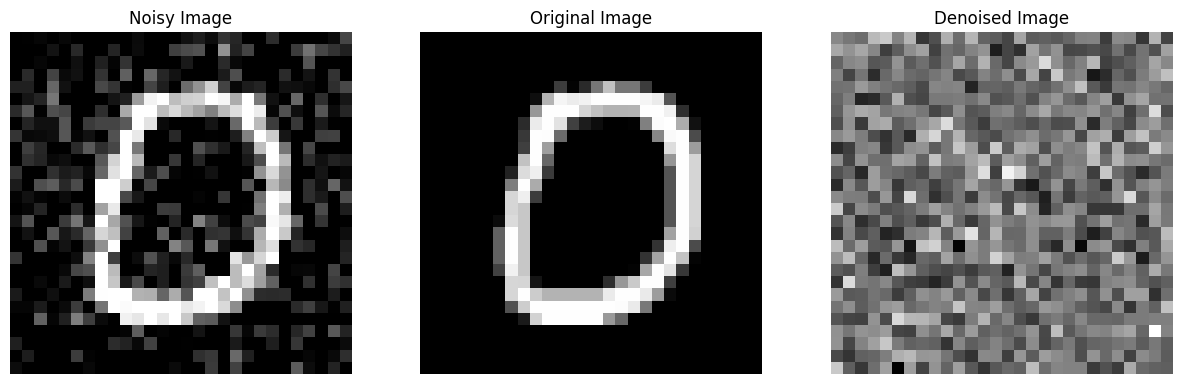

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming that the model (autoencoder) has already been trained with the noisy data

# Step 2: Make predictions on the noisy test data
reconstructed_imgs = autoencoder.predict(X_test_noisy)

# Step 3: Choose an index to visualize
index = 10  # You can choose any index from the test data

# Plot the noisy test image, original (clean) image, and reconstructed image

plt.figure(figsize=(15, 5))

# Plot the noisy test image
plt.subplot(1, 3, 1)
plt.imshow(X_test_noisy[index].reshape(28, 28), cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

# Plot the original (clean) test image
plt.subplot(1, 3, 2)
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot the denoised/reconstructed image
plt.subplot(1, 3, 3)
plt.imshow(reconstructed_imgs[index].reshape(28, 28), cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

# Show the plot
plt.show()



4. plot loss and accuracy using the history object

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 5.2239e-04 - loss: 0.6716 - val_accuracy: 0.0000e+00 - val_loss: 0.6750
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 6.6431e-04 - loss: 0.6708 - val_accuracy: 0.0000e+00 - val_loss: 0.6744
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 7.0659e-04 - loss: 0.6700 - val_accuracy: 0.0000e+00 - val_loss: 0.6737
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 6.4753e-04 - loss: 0.6691 - val_accuracy: 0.0000e+00 - val_loss: 0.6730
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 7.0914e-04 - loss: 0.6683 - val_accuracy: 0.0000e+00 - val_loss: 0.6722
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 7.3714e-04 - loss: 0.6673 - val_accuracy: 0.0000e+00 - val_loss: 0.6714
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 6.7863e-04 - loss: 0.6663 - val_accuracy: 0.0000e+00 - val_loss: 0.6706
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5

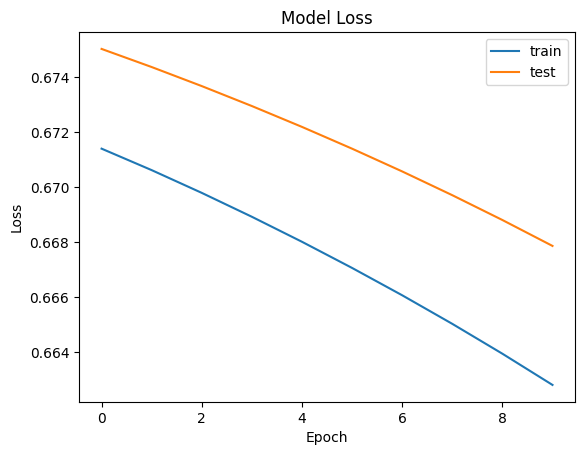

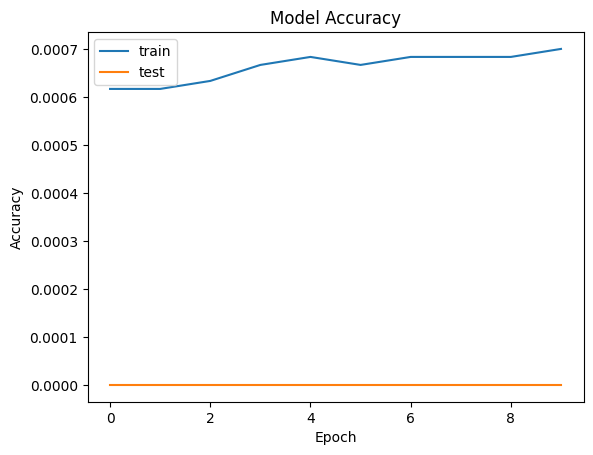

In [ ]:
import matplotlib.pyplot as plt

# Train the autoencoder
# Include 'accuracy' in the metrics list during compilation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

history = autoencoder.fit(X_train_noisy, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test_noisy, X_test_noisy))

# Plot the loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()